<a href="https://colab.research.google.com/github/bjanni1/Course-activities/blob/main/BjanniRadar_Spider_Plots_PythonTool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import math
# create a dataframe for our alternative analysis matrix
AA=pd.DataFrame(columns=['criteria','weight','ratingA','ratingB','scoreA','scoreB'])
print(AA)







Empty DataFrame
Columns: [criteria, weight, ratingA, ratingB, scoreA, scoreB]
Index: []


In [11]:
#first step: add a list of criteria
AA['criteria']=['feasibility','ROI','customerSatisfaction','risk','strategicAlignment']
print(AA)

               criteria weight ratingA ratingB scoreA scoreB
0           feasibility    NaN     NaN     NaN    NaN    NaN
1                   ROI    NaN     NaN     NaN    NaN    NaN
2  customerSatisfaction    NaN     NaN     NaN    NaN    NaN
3                  risk    NaN     NaN     NaN    NaN    NaN
4    strategicAlignment    NaN     NaN     NaN    NaN    NaN


In [12]:
AA['weight']=[0.4,0.12,0.7,0.10,0.1]
print(AA)

               criteria  weight ratingA ratingB scoreA scoreB
0           feasibility    0.40     NaN     NaN    NaN    NaN
1                   ROI    0.12     NaN     NaN    NaN    NaN
2  customerSatisfaction    0.70     NaN     NaN    NaN    NaN
3                  risk    0.10     NaN     NaN    NaN    NaN
4    strategicAlignment    0.10     NaN     NaN    NaN    NaN


In [13]:
#third step: rate each alternative across all criteria
AA['ratingA']=[1,4,5,2,1]
AA['ratingB']=[2,1,2,4,2]
#step 4: calculate partial scores by multiplying weight * ratings
for index,row in AA.iterrows():
  AA['scoreA'][index]=row['ratingA']*row['weight']
  AA['scoreB'][index]=row['ratingB']*row['weight']

print(AA)

               criteria  weight  ratingA  ratingB scoreA scoreB
0           feasibility    0.40        1        2    0.4    0.8
1                   ROI    0.12        4        1   0.48   0.12
2  customerSatisfaction    0.70        5        2    3.5    1.4
3                  risk    0.10        2        4    0.2    0.4
4    strategicAlignment    0.10        1        2    0.1    0.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
#step 5: add partial scores to get total scores
totalScoreA=0
totalScoreB=0
for index,row in AA.iterrows():
  totalScoreA+=row['scoreA']
  totalScoreB+=row['scoreA']

print(AA)

               criteria  weight  ratingA  ratingB scoreA scoreB
0           feasibility    0.40        1        2    0.4    0.8
1                   ROI    0.12        4        1   0.48   0.12
2  customerSatisfaction    0.70        5        2    3.5    1.4
3                  risk    0.10        2        4    0.2    0.4
4    strategicAlignment    0.10        1        2    0.1    0.2


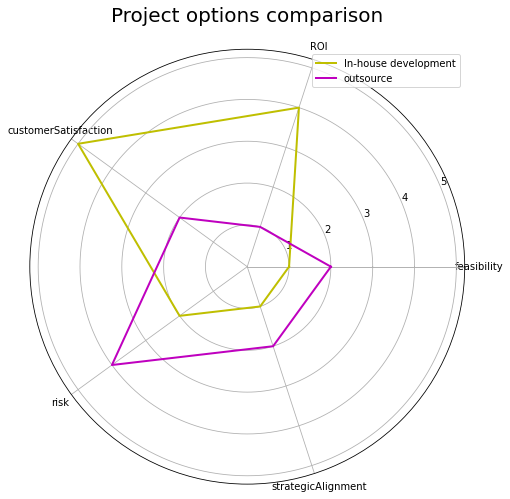

In [29]:
import numpy as np
import matplotlib.pyplot as plt
axisLocations = np.linspace(start=0, stop=2 * np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingsA=AA['ratingA']
ratingsB=AA['ratingB']
ratingsACircular=np.concatenate((ratingsA,[ratingsA[0]]))
ratingsBCircular=np.concatenate((ratingsB,[ratingsB[0]]))
plt.figure(figsize=(8,8))
plt.subplot(polar=True)
plt.plot(axisLocations,ratingsACircular,'y-', linewidth=2, label='In-house development')
plt.plot(axisLocations,ratingsBCircular,'m-', linewidth=2, label='outsource')
plt.title('Project options comparison', size=20)
lines, labels =plt.thetagrids(np.degrees(axisLocations), labels=AA['criteria'])
plt.legend()
plt.show()